# Traitement général

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold
from sklearn import preprocessing

## Chargement des données

In [ ]:
data = pd.read_csv("drive/MyDrive/data/alternance/05_classification_automatique/description_produits.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

3 colonnes m'intéressent
- `uniq_id` pour faire le lien avec les images,
- `product_category_tree` pour connaître la classification du produit
- `description`

Gestion des valeurs manquantes

In [ ]:
data = data[["uniq_id", "description", "product_category_tree"]]

data.isna().sum()

,0
uniq_id,0
description,0
product_category_tree,0


Gestion des valeurs duppliquées

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.head()

,uniq_id,description,product_category_tree
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[""Home Furnishing >> Curtains & Accessories >>..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."


In [ ]:
data["product_category"] = data["product_category_tree"].\
  apply(lambda x: x.split(" >> ")[0][2:])

data = data[["uniq_id", "description", "product_category"]]
data.head()

/tmp/ipython-input-6-2063806455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["product_category"] = data["product_category_tree"].\


,uniq_id,description,product_category
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing


In [ ]:
path = "/content/drive/MyDrive/data/alternance/05_classification_automatique/Images/raw/"

data["uniq_id"] = data["uniq_id"].apply(lambda x: path+x+".jpg")
data.head()

,uniq_id,description,product_category
0,/content/drive/MyDrive/data/alternance/05_clas...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,/content/drive/MyDrive/data/alternance/05_clas...,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,/content/drive/MyDrive/data/alternance/05_clas...,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,/content/drive/MyDrive/data/alternance/05_clas...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,/content/drive/MyDrive/data/alternance/05_clas...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data["product_category"])
data["label"] = le.transform(data["product_category"])

In [ ]:
data.describe()

,label
count,1050.000000
mean,3.000000
std,2.000953
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [ ]:
data.product_category.value_counts()

,count
product_category,
Home Furnishing,150
Baby Care,150
Watches,150
Home Decor & Festive Needs,150
Kitchen & Dining,150
Beauty and Personal Care,150
Computers,150


## Visualisation des données

In [ ]:
def list_fct(name) :
    list_image_name = [data["uniq_id"][i] for i in range(len(data)) if data["product_category"][i]==name]
    return list_image_name

Watches


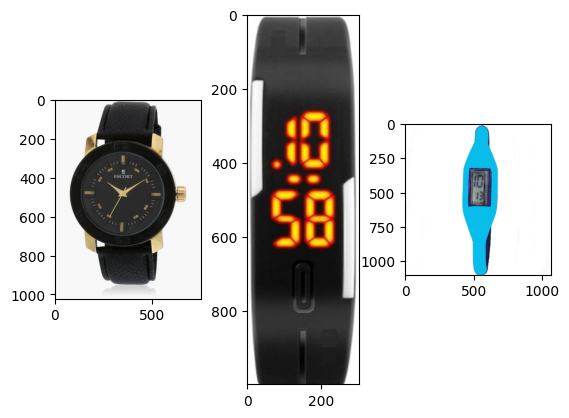

Baby Care


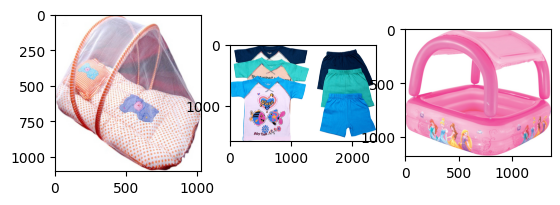

Beauty and Personal Care


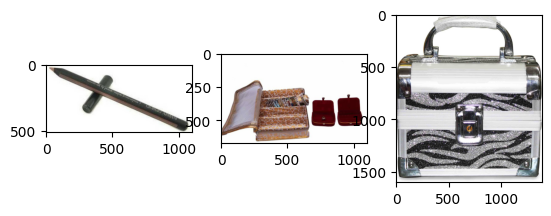

Home Decor & Festive Needs


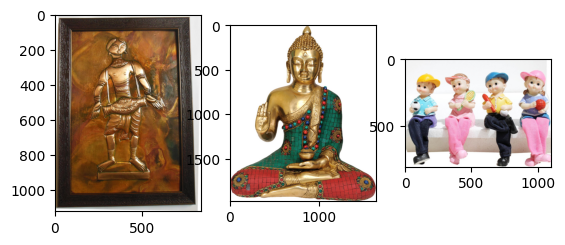

Home Furnishing


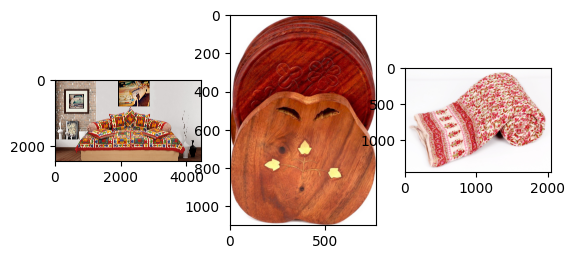

Computers


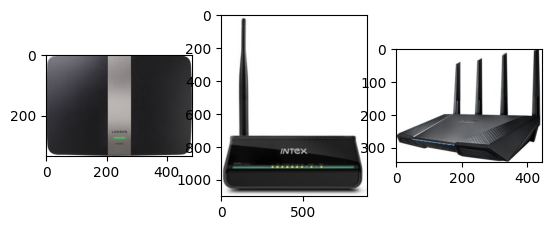

Kitchen & Dining


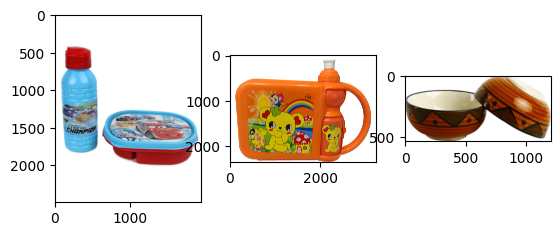

In [ ]:
from matplotlib.image import imread

# récupérer les images par catégorie dans des listes
list_watches=[data["uniq_id"][i] for i in range(len(data)) if data["product_category"][i]=="Watches"]
list_baby_care=[data["uniq_id"][i] for i in range(len(data)) if data["product_category"][i]=="Baby Care"]
list_beauty_personal_care=[data["uniq_id"][i] for i in range(len(data)) if data["product_category"][i]=="Beauty and Personal Care"]
list_home_decor_festiv_needs=[data["uniq_id"][i] for i in range(len(data)) if data["product_category"][i]=="Home Decor & Festive Needs"]
list_home_furnishing=[data["uniq_id"][i] for i in range(len(data)) if data["product_category"][i]=="Home Furnishing"]
list_computers=[data["uniq_id"][i] for i in range(len(data)) if data["product_category"][i]=="Computers"]
list_kitchen_dining=[data["uniq_id"][i] for i in range(len(data)) if data["product_category"][i]=="Kitchen & Dining"]

list_labels = ["Watches", "Baby Care", "Beauty and Personal Care", "Home Decor & Festive Needs", "Home Furnishing", "Computers", "Kitchen & Dining"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

<Axes: ylabel='count'>

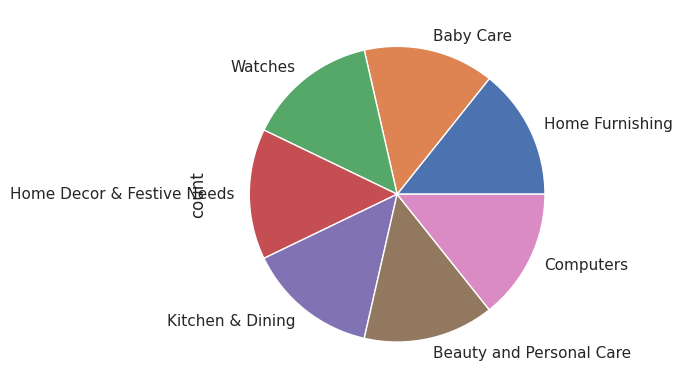

In [ ]:
sns.set()
data.product_category.value_counts().plot(kind="pie")

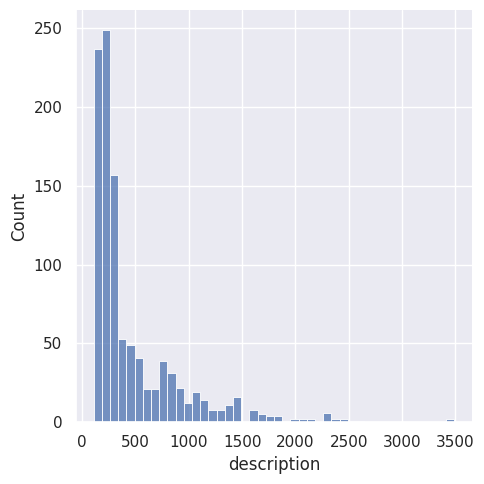

In [ ]:
tmp = data.description.str.len()
sns.displot(tmp)

# Traitement du texte

## Nettoyage du texte

In [ ]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

sns.set

logging.disable(logging.WARNING)

In [ ]:
raw_corpus = " ".join(data.description)
tmp = pd.Series(raw_corpus).value_counts()
list_unique_words = tmp[tmp == 1]

In [ ]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('words')

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', '&']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    filtered_w2 = lower_start_fct(filtered_w2)
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@"))
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    non_rare_w = [w for w in lw if w not in list_unique_words]
    lem_w = lemma_fct(non_rare_w)
    # set_lem_w = set(lem_w)
    #transf_desc_text = ' '.join(lem_w)
    return lem_w

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


illustrer le nettoyage avec une desription

In [ ]:
sentence = data["description"][0]

In [ ]:
sentence = tokenizer_fct(sentence)
len(sentence)

247

In [ ]:
sentence = stop_word_filter_fct(sentence)
len(sentence)

155

In [ ]:
non_rare_w = [w for w in sentence if w not in list_unique_words]
lem_w = lemma_fct(non_rare_w)
len(lem_w)

155

In [ ]:
lem_w

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'height',
 'pack',
 'price',
 '899',
 'this',
 'curtain',
 'enhances',
 'look',
 'interiors.this',
 'curtain',
 'made',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric.it',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring.it',
 'make',
 'room',
 'environment',
 'romantic',
 'loving.this',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance.give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'the',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'these',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evenin

In [ ]:
len(lem_w)

155

In [ ]:
data['sentence_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['sentence_dl'] = data['description'].apply(lambda x : transform_dl_fct(x))
data['bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data.shape

(1050, 8)

supprimer les mots les plus courants dans les descriptions

In [ ]:
n = 30
doublons = []

target_values = list(set(data.product_category))

for i, t in enumerate(target_values):
    df_t = data[data["product_category"] == t]

    df_anti_t = data[data["product_category"] != t]

    dbl = [i for i in pd.Series(df_t.bow_lem.sum()).value_counts().head(n).index
        if i in pd.Series(df_anti_t.bow_lem.sum()).value_counts().head(n).index]


    if i == 0 :
        doublons = dbl
    else:
        doublons += dbl

doublons = set(doublons)
print(doublons)

{'shipping', 'type', 'material', 'pack', 'online', 'day', 'feature', 'price', 'buy', 'only', 'the', 'flipkart.com', 'cash', 'guarantee', 'free', 'product', 'delivery', 'genuine', 'for', 'specification', 'box', 'color', 'replacement'}


In [ ]:
data['bow_lem'] = data['bow_lem'].apply(lambda desc: [w for w in desc if w not in doublons])

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_sent_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    non_rare_w = [w for w in lw if w not in list_unique_words]
    dble = [w for w in non_rare_w if w not in doublons]
    lem_w = lemma_fct(dble)
    # set_lem_w = set(lem_w)
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

data['sentence_bow_lem'] = data['description'].apply(lambda x : transform_sent_bow_lem_fct(x))

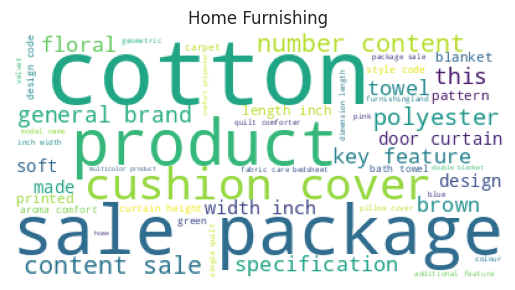

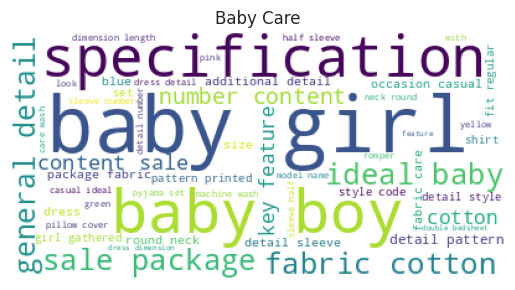

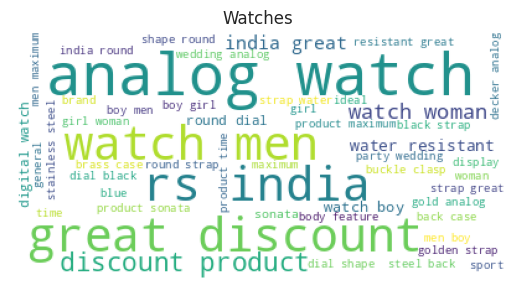

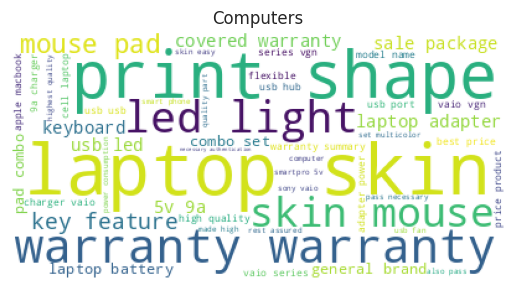

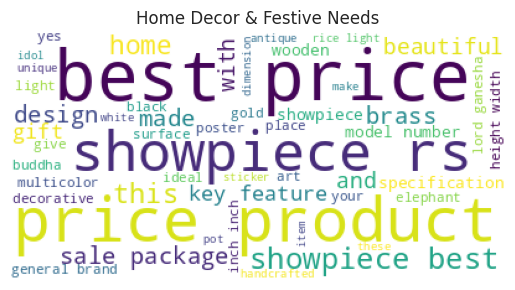

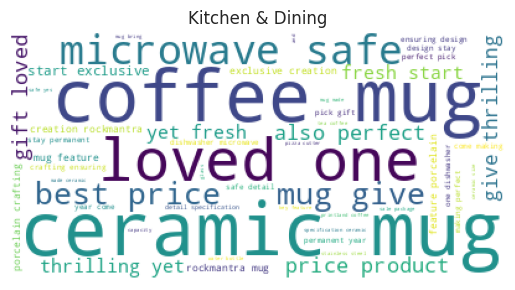

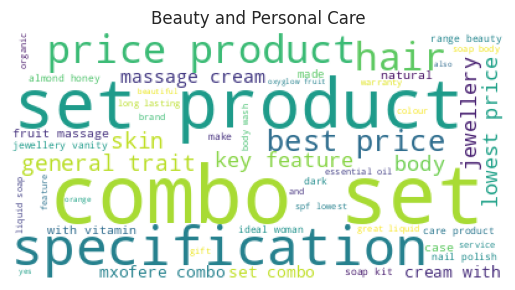

In [ ]:
from wordcloud import WordCloud
target_values = set(data.product_category.values)
for i, t in enumerate(target_values):
    df = data[data["product_category"] == t]
    corpus = " ".join(df.sentence_bow_lem)

    wordcloud = WordCloud(background_color="white",
                        stopwords=[],
                        max_words=50).generate(corpus)

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(t)
    plt.show()

## PoC

In [ ]:
l_cat = list(data['product_category'].unique())
y_cat_num = [l_cat.index(cat) for cat in data['product_category']]

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

data['length_bow'] = data['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data['length_bow'].max())
data['length_dl'] = data['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data['length_dl'].max())

max length bow :  379
max length dl :  632


In [ ]:
import time
from matplotlib.colors import ListedColormap


# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=5, n_iter=2000,
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)

    # Détermination des clusters à partir des données après Tsne
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))

    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')

    print(scatter.legend_elements())
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')

    ax = fig.add_subplot(122)

    # Couleurs dans l'ordre souhaité (7 couleurs ici par ex)
    my_rgb_colors = [
        (0.65, 0.33, 0.15),  # marron
        (0.96, 0.5, 0.74),  # rose
        (0.6, 0.6, 0.6),  # gris
        (0.59, 0.3, 0.63),  # violet
        (1.0, 0.49, 0.0),  # violet
        (0.21, 0.49, 0.72),  # violet
        (0.89, 0.10, 0.10),  # violet
    ]

    # Créer la colormap
    custom_cmap = ListedColormap(my_rgb_colors, name='my_cmap')

    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap=custom_cmap)
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')

    plt.show()
    print("ARI : ", ARI)


### BoW et tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


feat = 'sentence_bow_lem'

# 1. Regrouper le texte par 'product_category'
grouped = data.groupby('product_category')[feat].apply(lambda texts: ' '.join(texts)).reset_index()

# 2. Ensuite, tu peux appliquer le TF-IDF sur les textes groupés
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf_fit = ctf.fit(grouped[feat])
ctf_transform = ctf.transform(grouped[feat])

In [ ]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)


cv_fit = cvect.fit(data[feat])
ctf_fit = ctf.fit(data[feat])

cv_transform = cvect.transform(data[feat])
ctf_transform = ctf.transform(data[feat])

In [ ]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.3186 time :  24.0

Tf-idf : 
--------


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.4607 time :  12.0


In [ ]:
ctf_transform.shape

(1050, 5316)

In [162]:
sns.set()

([<matplotlib.lines.Line2D object at 0x7ffa496a3310>, <matplotlib.lines.Line2D object at 0x7ffa496b14d0>, <matplotlib.lines.Line2D object at 0x7ffa496b0e90>, <matplotlib.lines.Line2D object at 0x7ffa496b1d10>, <matplotlib.lines.Line2D object at 0x7ffa4984d150>, <matplotlib.lines.Line2D object at 0x7ffa4984f1d0>, <matplotlib.lines.Line2D object at 0x7ffa4984f450>], ['$\\mathdefault{0}$', '$\\mathdefault{1}$', '$\\mathdefault{2}$', '$\\mathdefault{3}$', '$\\mathdefault{4}$', '$\\mathdefault{5}$', '$\\mathdefault{6}$'])


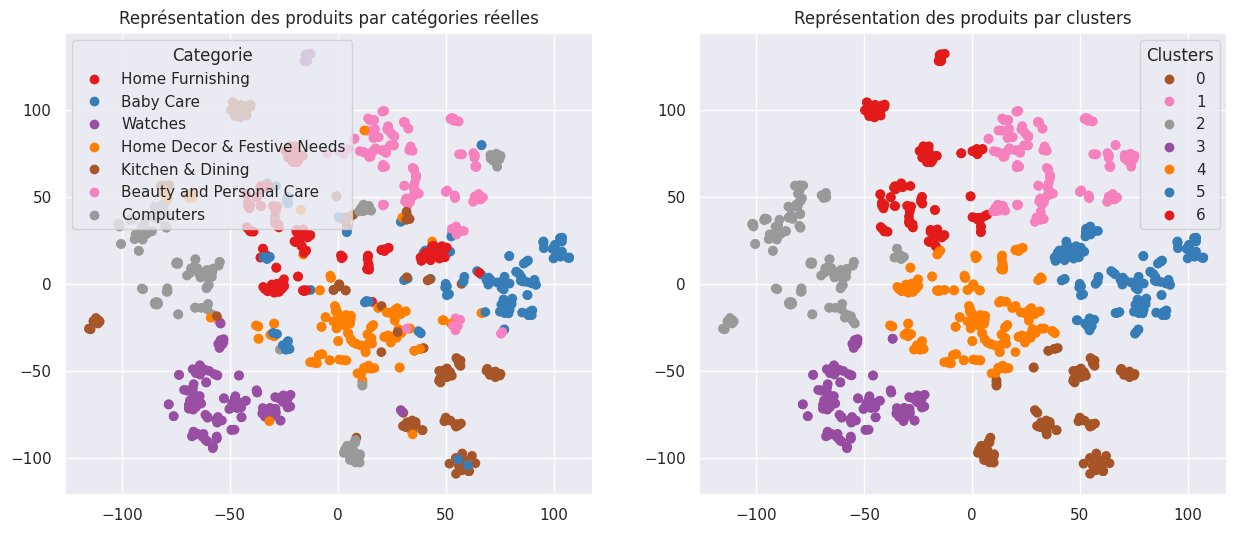

ARI :  0.4607


In [163]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### retrouver vérifier des articles spécifiques

In [ ]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["product_category"]
df_tsne["cluster"] = labels

In [ ]:
df = df_tsne.loc[(df_tsne["class"] == "Kitchen & Dining")]
df["cluster"].value_counts()

,count
cluster,
0,78
6,35
2,19
4,11
1,4
5,3


In [ ]:
df = df_tsne.loc[(df_tsne["class"] == "Kitchen & Dining") & (df_tsne["cluster"] == 2)]
df

,tsne1,tsne2,class,cluster
38,-80.724586,55.757687,Kitchen & Dining,2
129,-113.178192,-21.195656,Kitchen & Dining,2
131,-114.435478,-25.922876,Kitchen & Dining,2
135,-110.249466,-21.471195,Kitchen & Dining,2
139,-111.991180,-19.427660,Kitchen & Dining,2
151,-111.031738,-22.580292,Kitchen & Dining,2
157,-115.265556,-25.525135,Kitchen & Dining,2
159,-112.803238,-22.120115,Kitchen & Dining,2
162,-114.769112,-25.807886,Kitchen & Dining,2
169,-111.614571,-21.240561,Kitchen & Dining,2


tsne1            -79.811607
tsne2             55.839798
class      Kitchen & Dining
cluster                   2
Name: 677, dtype: object


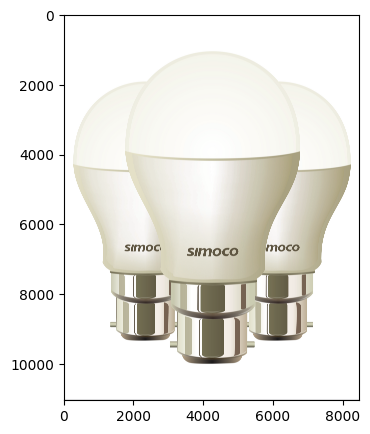

Buy Simoco 7 W, 9 W, 12 W LED Bulb for Rs.829 online. Simoco 7 W, 9 W, 12 W LED Bulb at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.


In [161]:
import cv2

# Affichage image "shine" considérée comme "cloudy"
id = 677
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = data["uniq_id"][id]
image = cv2.imread(filename)
plt.imshow(image)
plt.show()

print(data["description"][id])

In [ ]:
print(data.iloc[id])

uniq_id             /content/drive/MyDrive/data/alternance/05_clas...
description         Specifications of Doraemon Gift Family Ceramic...
product_category                                            Baby Care
label                                                               0
clean_gray_pict     /content/drive/MyDrive/data/alternance/05_clas...
sentence_bow        specifications doraemon gift family ceramic co...
sentence_dl         specifications of doraemon gift family ceramic...
bow_lem             [doraemon, gift, family, ceramic, coffee, mug,...
sentence_bow_lem    specification doraemon gift family ceramic cof...
length_bow                                                         25
length_dl                                                          30
Name: 1004, dtype: object


### Word2Vec

In [ ]:
# !pip install gensim

In [ ]:
# !pip install --force-reinstall numpy==1.26.4

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

ModuleNotFoundError: No module named 'gensim'

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0

for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input],word_vec)

embed_model.summary()

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

NameError: name 'embeddings' is not defined

### BERT

In [ ]:
df_data = data.copy()

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True,
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")

        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0],
                             bert_inp['token_type_ids'][0],
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    return input_ids, token_type_ids, attention_mask, bert_inp_tot


# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size],
                                                                      bert_tokenizer, max_length)

        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids,
                                 "input_mask" : attention_mask,
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))

    features_bert = np.array(last_hidden_states_tot).mean(axis=1)

    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)

    return features_bert, last_hidden_states_tot

#### Vers. Hugging Face

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_data['sentence_bow_lem'].to_list()

In [ ]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### Vers. Tensorflow

In [ ]:
import tensorflow_hub as hub
import tensorflow_text

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [ ]:
sentences = df_data['sentence_dl'].to_list()

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='TFhub')

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### USE

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences = df_data['sentence_dl'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Traitement des images

## SIFT

In [ ]:
import cv2
import time
from sklearn import cluster, metrics, manifold, decomposition

In [ ]:
l_cat = list(set(data['product_category']))
print("catégories : ", l_cat)
y_cat_num = [(6-l_cat.index(data.iloc[i]['product_category'])) for i in range(len(data))]


def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=5, n_iter=250,
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)

    # Détermination des clusters à partir des données après Tsne
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))

    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')

    # ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')

    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')

    plt.show()
    print("ARI : ", ARI)


catégories :  ['Baby Care', 'Home Furnishing', 'Beauty and Personal Care', 'Watches', 'Home Decor & Festive Needs', 'Kitchen & Dining', 'Computers']


In [ ]:
def clean_img_path(img_path) :

  nw_img_path = img_path.split("/")
  nw_img_path[-2] = "clean"
  nw_img_path = "/".join(nw_img_path)

  return nw_img_path

data["clean_gray_pict"] = data["uniq_id"].apply(clean_img_path)

In [ ]:
img_list = [cv2.imread(x) for x in data["clean_gray_pict"]]

In [ ]:
extractor = cv2.SIFT_create(nfeatures= 500, nOctaveLayers=3)

keypoints = []
descriptors = []
i=0
for img in img_list:
  img_keypoints, img_descriptors = extractor.detectAndCompute(img, None)
  # keypoints.append(img_keypoints)
  descriptors.append(img_descriptors)

In [ ]:
print(f"len Before: {len(descriptors)}")

to_drop = []

for i, img_descriptors in enumerate(descriptors):
  if img_descriptors is None:
    to_drop.append(i)
    print(f"indexes: {to_drop}")
  for i in sorted(to_drop, reverse=True):
    del descriptors[i]
print(f"len After: {len(descriptors)}")

len Before: 1050
len After: 1050


In [ ]:
all_descriptors = []
for img_descriptors in descriptors:
  for descriptor in img_descriptors:
    all_descriptors.append(descriptor)
all_descriptors = np.stack(all_descriptors)

In [ ]:
from scipy.cluster.vq import kmeans, vq

k = 100

codebook, variance = kmeans(all_descriptors, k, 1)

In [ ]:
visual_words=[]

for img_descriptors in descriptors:
    img_visual_words, distance = vq(img_descriptors, codebook)
    visual_words.append(img_visual_words)

In [ ]:
frequency_vectors = []
for img_visual_words in visual_words:
  img_frequency_vector = np.zeros(k)
  for word in img_visual_words:
    img_frequency_vector[word]+=1
  frequency_vectors.append(img_frequency_vector)
frequency_vectors = np.stack(frequency_vectors)

N = 1050

df = np.sum(frequency_vectors > 0, axis=0)

idf = np.log(N/df)

tfidf = frequency_vectors * idf

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.0269 time :  3.0


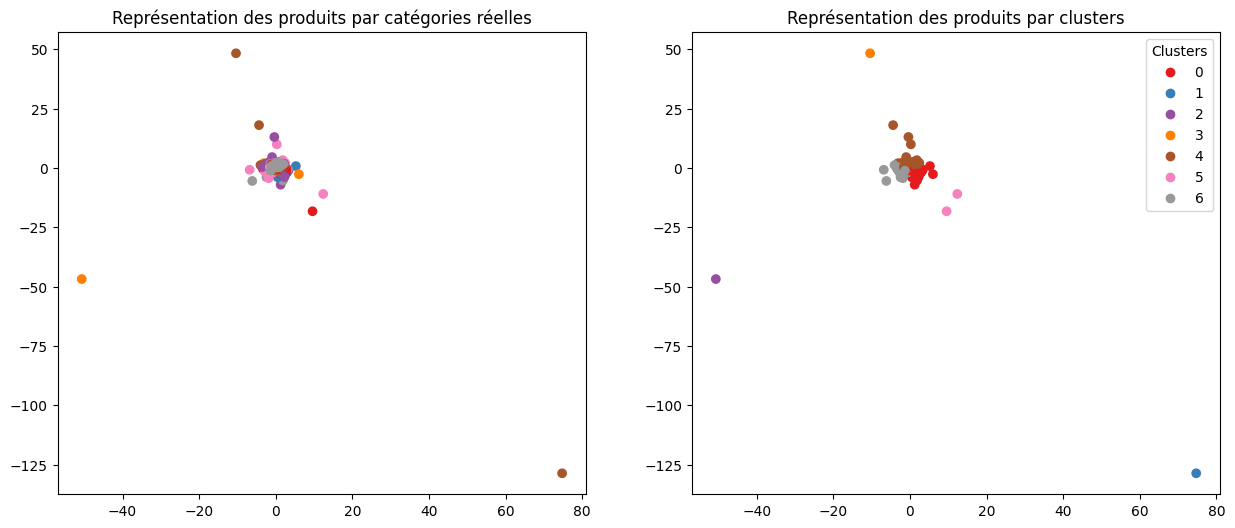

ARI :  0.0269


In [ ]:
ARI, X_tsne, labels = ARI_fct(tfidf)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## VGG16

In [ ]:
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


#### Création features images

In [ ]:
images_features = []
i=0
for image_file in data["uniq_id"] : #
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


100
200
300
400
500
600


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

#### Réduction Dimension

In [ ]:
from sklearn import manifold, decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


T-SNE

In [ ]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


temps de T-SNE :            30.51 secondes


In [ ]:
sns.set()

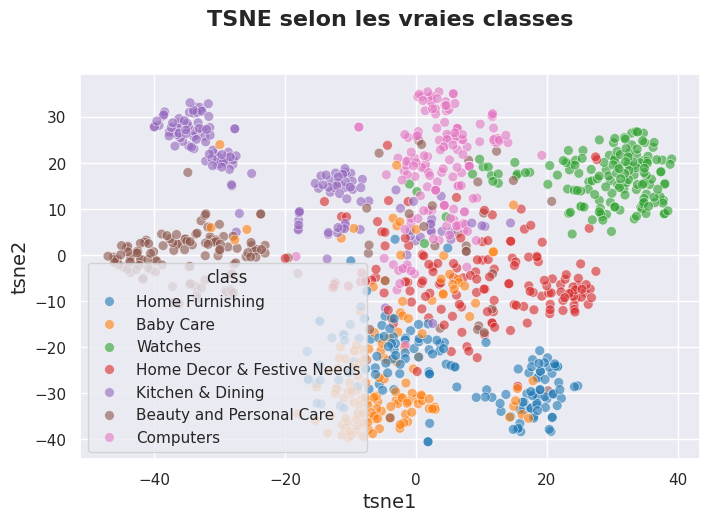

In [ ]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["product_category"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne)

plt.title('TSNE selon les vraies classes', fontsize = 16, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 14)
plt.ylabel('tsne2', fontsize = 14)
# plt.legend(prop={'size': 14})

plt.show()


#### Clustering

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init=100)

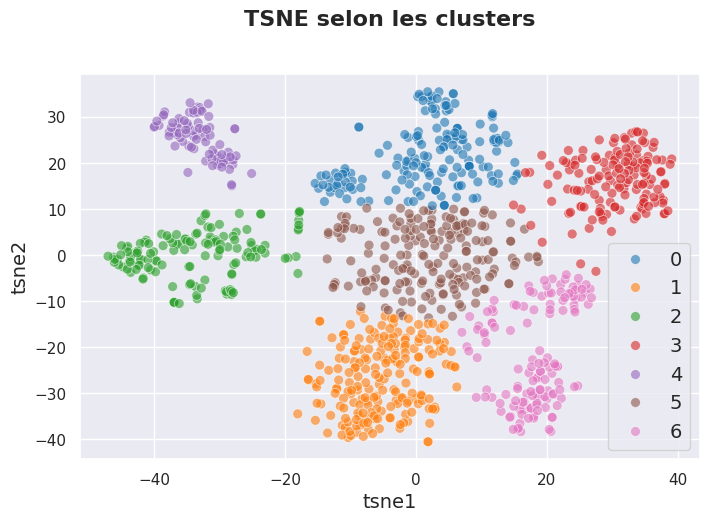

ARI :  0.4505873127695997


In [ ]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 16, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 14)
plt.ylabel('tsne2', fontsize = 14)
plt.legend(prop={'size': 14})

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

#### Confusion matrix

In [ ]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

In [ ]:
conf_mat = metrics.confusion_matrix(data["label"], cls.labels_)
print(conf_mat)

[[  3  26   1   1 110   1   8]
 [117  13   1   8   5   1   5]
 [  1  35   1 112   1   0   0]
 [  1  77   8   5   4   0  55]
 [  0   5   0   0  79   0  66]
 [ 10  29   0  32   1  78   0]
 [  0   2 135  13   0   0   0]]


In [ ]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)

    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x])

    return labels['y_pred_transform']

In [ ]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [1 3 6 2 0 5 4]
[[110   3   1  26   8   1   1]
 [  5 117   8  13   5   1   1]
 [  1   1 112  35   0   0   1]
 [  4   1   5  77  55   0   8]
 [ 79   0   0   5  66   0   0]
 [  1  10  32  29   0  78   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       150
           1       0.89      0.78      0.83       150
           2       0.65      0.75      0.70       150
           3       0.41      0.51      0.46       150
           4       0.49      0.44      0.46       150
           5       0.97      0.52      0.68       150
           6       0.92      0.90      0.91       150

    accuracy                           0.66      1050
   macro avg       0.70      0.66      0.67      1050
weighted avg       0.70      0.66      0.67      1050



<Axes: >

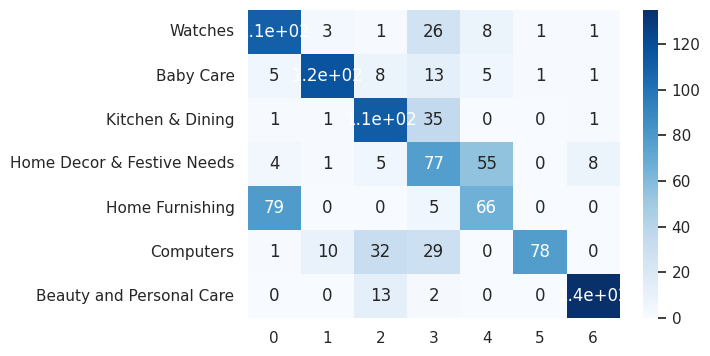

In [ ]:
list_labels = ["Watches", "Baby Care", "Kitchen & Dining", "Home Decor & Festive Needs", "Home Furnishing", "Computers", "Beauty and Personal Care"]
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

Now that the descriptors are stacked correctly, we can proceed with computing the Bag of Visual Words.